# 🚀 Artificial Intelligence - 2025 | Week 1
*Unlock the Future with Intelligent Machines* 🤖✨

- **Author:** Teerapong Panboonyuen (also known as Kao Panboonyuen)
- **GitHub:** [kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1](https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1)

---
### ⚠️ Disclaimer

This notebook and all code contained within are provided **for academic and educational purposes only**.

The forecasting models and results are **illustrative examples** designed to demonstrate time series techniques and **should NOT be used for any financial or investment decisions**.

Please conduct your own thorough analysis and consult qualified financial professionals before making any real-world trading or investment choices.

**The authors and affiliated institutions disclaim any liability for losses or damages resulting from the use of this material.**

---

*Happy learning and stay curious!* 🚀

![](https://iongroup.com/wp-content/uploads/2025/01/T16277_Blog-post-on-24-hour-trading-in-equities-markets_Featured-Image.png)


# 🛠️ Step 1: Load dataset

In [115]:
# 📈 Thai Stock Forecasting Notebook
# 🧠 Academic Use Only

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
raw_df = pd.read_csv("https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1/raw/main/dataset/{INSERT_YOUR_DATASET}.csv", parse_dates=['Date'])

# Clean data from wide to long format
columns_to_melt = [col for col in raw_df.columns if 'Close' in col or 'Volume' in col]
stock_names = raw_df['Stock'].dropna().unique().tolist()

cleaned_data = pd.DataFrame()
for i, stock in enumerate(stock_names):
    date_col = raw_df['Date']
    close_col = raw_df[f'Close.{i}' if i != 0 else 'Close']
    volume_col = raw_df[f'Volume.{i}' if i != 0 else 'Volume']
    temp_df = pd.DataFrame({
        'Date': date_col,
        'Close': close_col,
        'Volume': volume_col,
        'Stock': stock
    })
    cleaned_data = pd.concat([cleaned_data, temp_df], axis=0)

# Drop rows with missing Close prices
cleaned_data.dropna(subset=['Close'], inplace=True)

# Update df with cleaned data
df = cleaned_data.sort_values(by=['INSERT_YOUR_FEATURE', 'INSERT_YOUR_FEATURE'])

In [117]:
df.head()

,Date,Close,Volume,Stock
383,2024-01-03,205.84573364257812,3801200.0,ADVANC
384,2024-01-04,205.84573364257812,2936200.0,ADVANC
385,2024-01-05,201.14605712890625,9841600.0,ADVANC
386,2024-01-08,201.14605712890625,3091900.0,ADVANC
387,2024-01-09,203.9658660888672,5244000.0,ADVANC


# 🔍 Step 2: EDA & Plotting

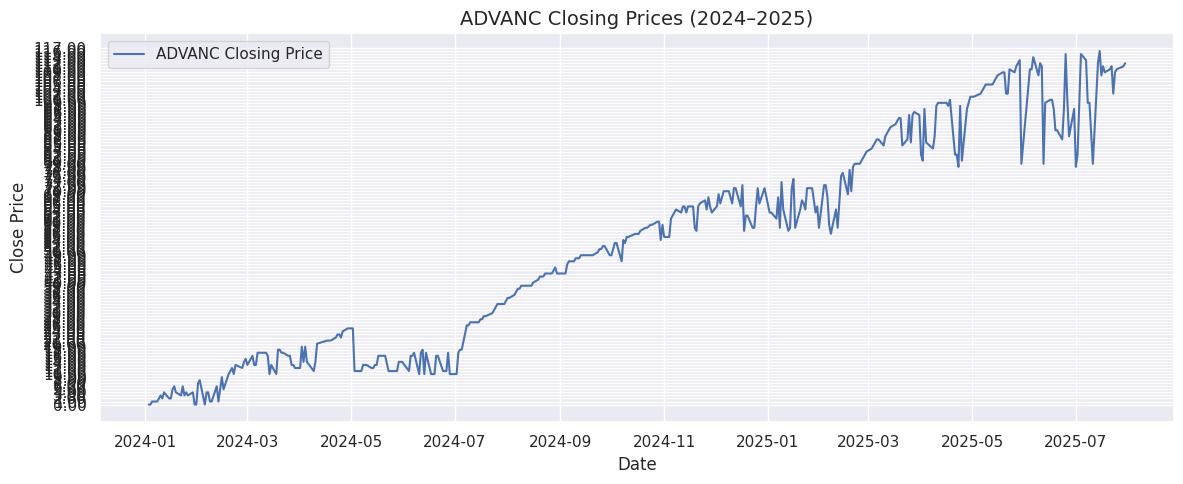

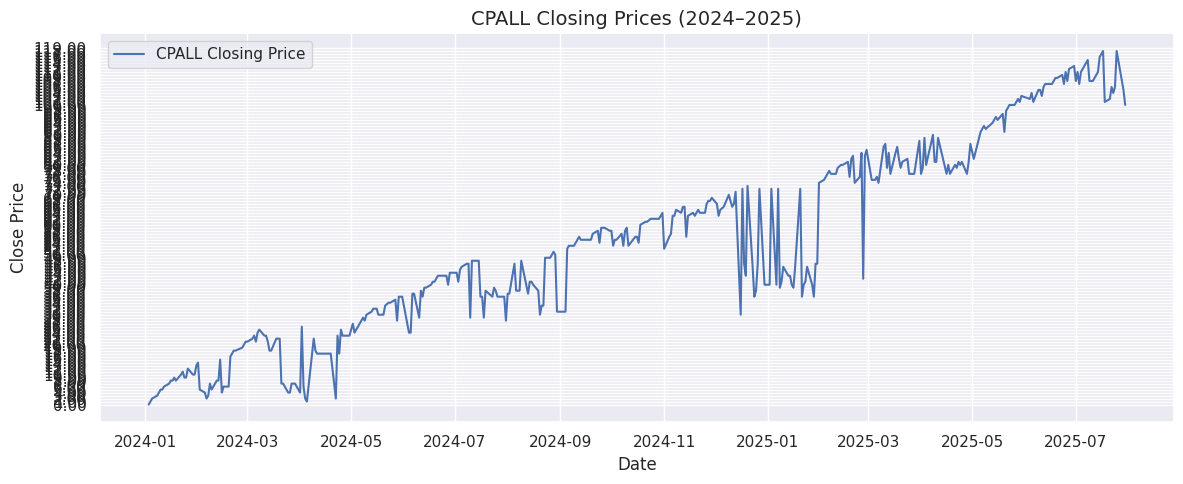

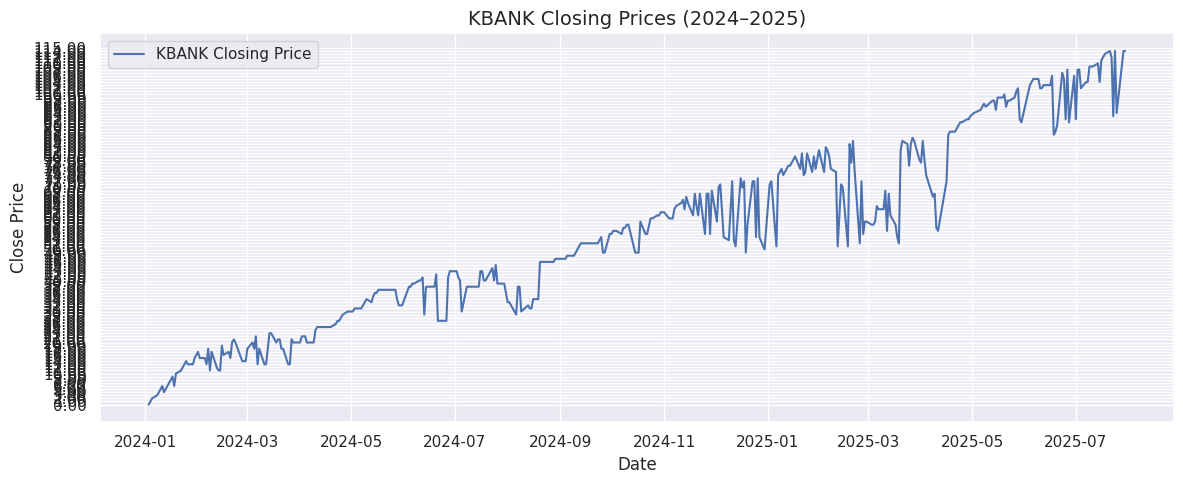

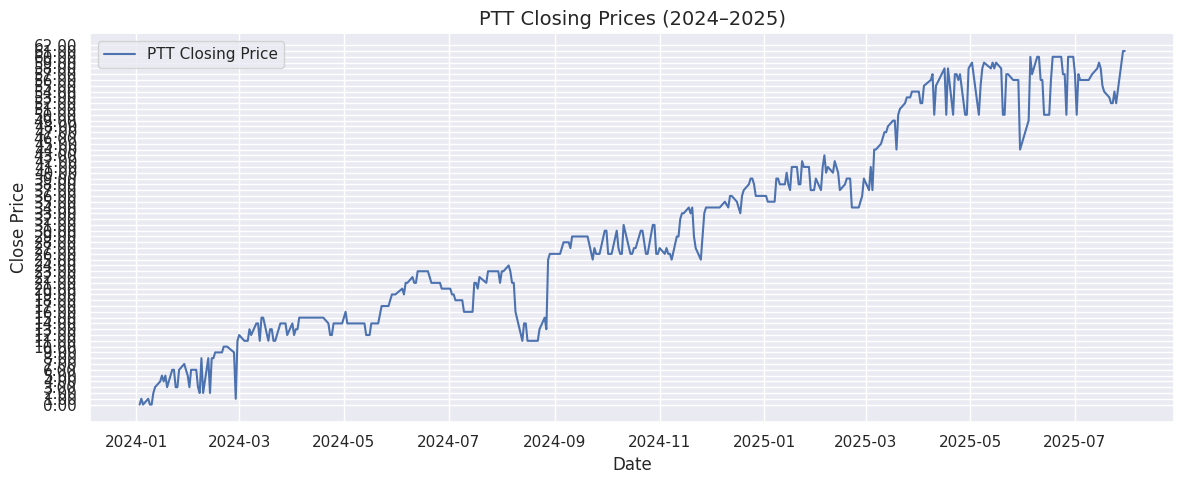

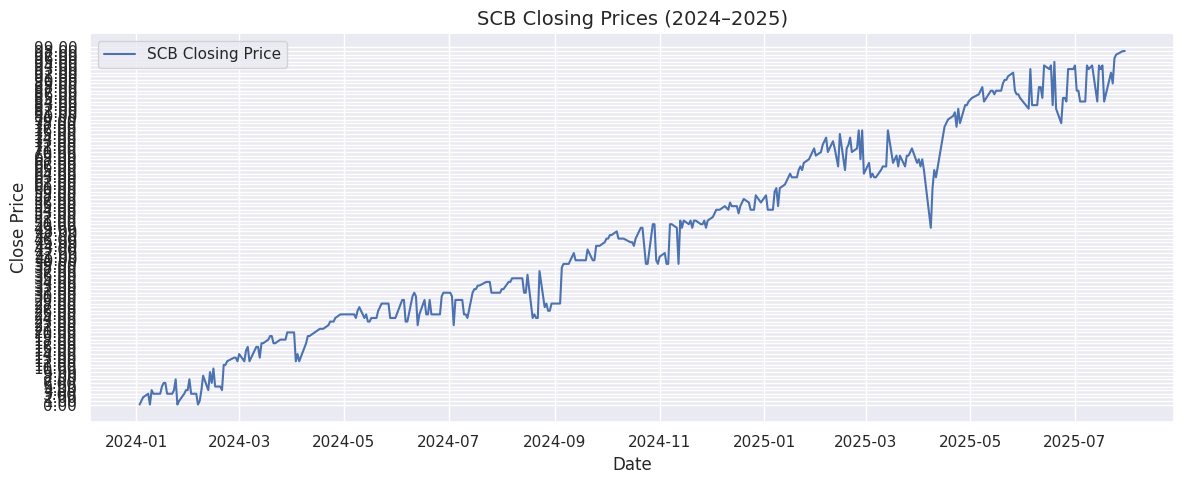

In [ ]:
sns.set(style="darkgrid")
stocks = df['INSERT_YOUR_FEATURE'].unique()

for stock in stocks:
    plt.figure(figsize=(12, 5))
    sub = df[df['Stock'] == stock]
    plt.plot(sub['Date'], sub['Close'], label=f"{stock} Closing Price")
    plt.title(f"{stock} Closing Prices (2024–2025)", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.2f}'))
    plt.legend()
    plt.tight_layout()
    plt.show()

# 📉 Step 3: Stationarity Check (ADF Test)

In [119]:
# 📉 Step 3: Stationarity Check (ADF Test)
def check_stationarity(series, title):
    series = pd.to_numeric(series, errors='coerce')
    series = series.dropna()
    result = adfuller(series)
    print(f"\n{title}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] <= 0.05:
        print("=> Likely Stationary")
    else:
        print("=> Likely Non-Stationary")

sample = df[df['Stock'] == stocks[0]].copy()
sample['Close'] = pd.to_numeric(sample['Close'], errors='coerce')
sample.dropna(subset=['Close'], inplace=True)
check_stationarity(sample['Close'], f"ADF Test - {stocks[0]}")

sample['Close_diff'] = sample['Close'].diff()
sample.dropna(subset=['Close_diff'], inplace=True)
check_stationarity(sample['Close_diff'], f"ADF Test (Differenced) - {stocks[0]}")


ADF Test - ADVANC
ADF Statistic: -0.6270
p-value: 0.8648
=> Likely Non-Stationary

ADF Test (Differenced) - ADVANC
ADF Statistic: -8.6843
p-value: 0.0000
=> Likely Stationary


# ✂️ Step 4: Train-Test Split

In [120]:
train_ratio = 0.8
split_idx = int(len(sample) * train_ratio)
train, test = sample.iloc[:split_idx], sample.iloc[split_idx:]

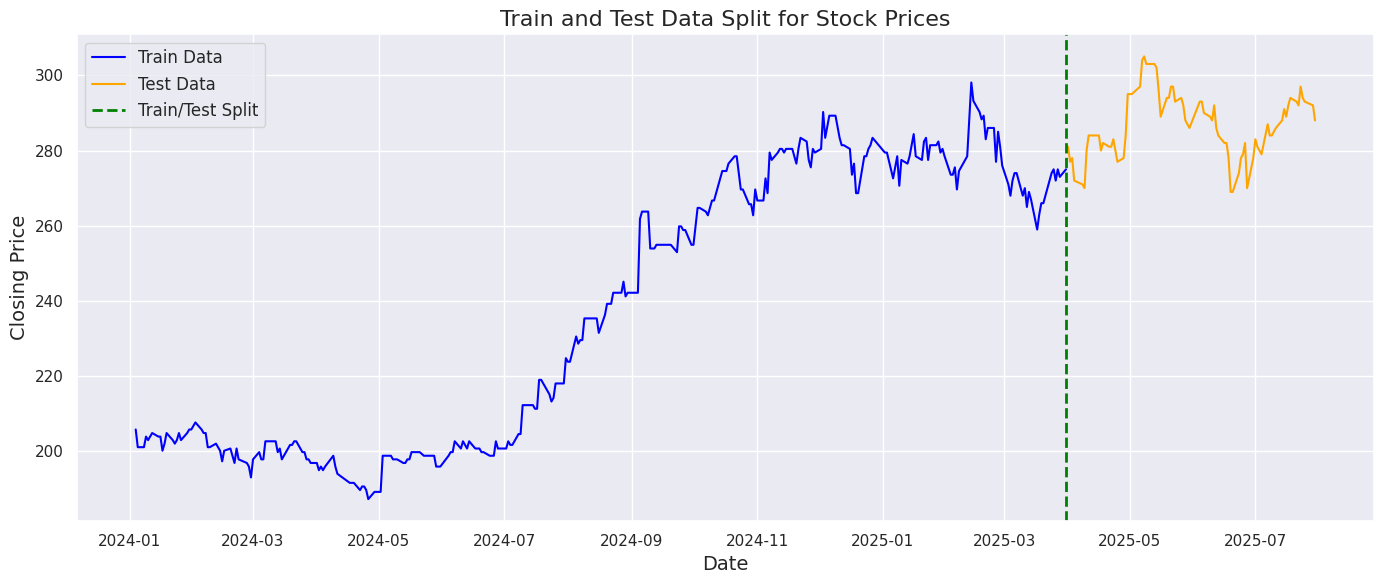

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(train['Date'], train['Close'], label='Train Data', color='blue')
plt.plot(test['Date'], test['Close'], label='Test Data', color='orange')

# Highlight train/test boundary
plt.axvline(x=train['Date'].iloc[-1], color='green', linestyle='--', lw=2, label='Train/Test Split')

plt.title('Train and Test Data Split for Stock Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Step 5: Moving Average (MA)

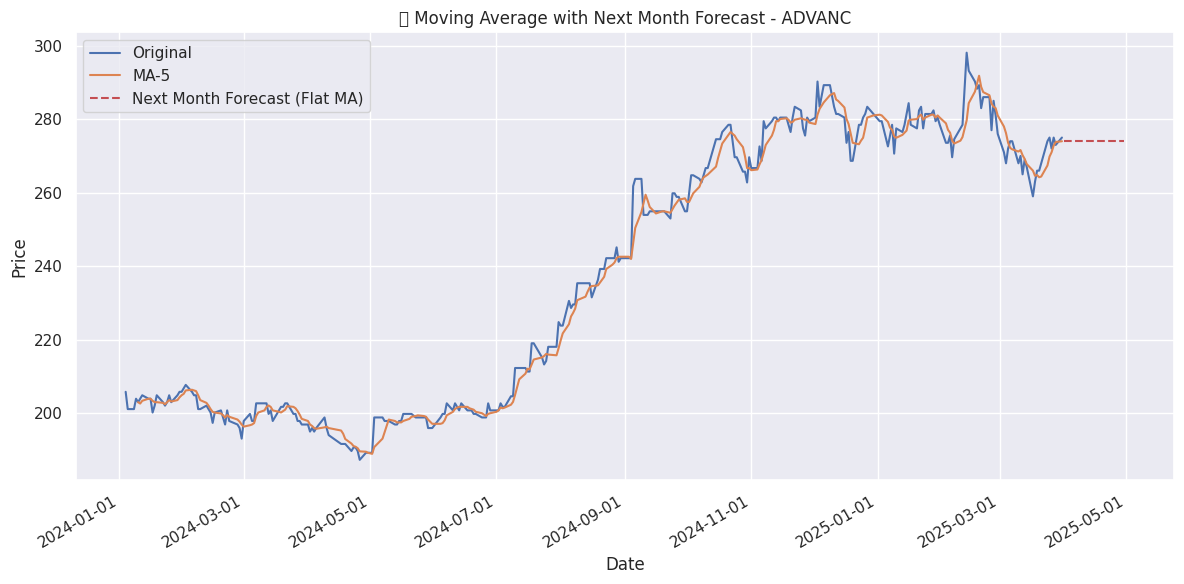

In [ ]:
import pandas as pd
import matplotlib.dates as mdates

# Calculate MA on train set
ma_window = 5
train['MA'] = # INSERT YOUR CODE HERE

plt.figure(figsize=(12,6))

# Plot original Close prices
plt.plot(train['Date'], train['Close'], label='Original')

# Plot Moving Average
plt.plot(train['Date'], train['MA'], label=f'MA-{ma_window}')

# Forecast for next 30 days as flat line using last MA value
last_date = train['Date'].max()
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
forecast_values = [train['MA'].iloc[-1]] * 30  # flat forecast as last MA value

plt.plot(forecast_dates, forecast_values, 'r--', label='Next Month Forecast (Flat MA)')

# Formatting plot
plt.legend()
plt.title(f"📊 Moving Average with Next Month Forecast - {stocks[0]}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotate date labels
plt.tight_layout()
plt.show()


# 🧮 Step 6: ARIMA Forecast

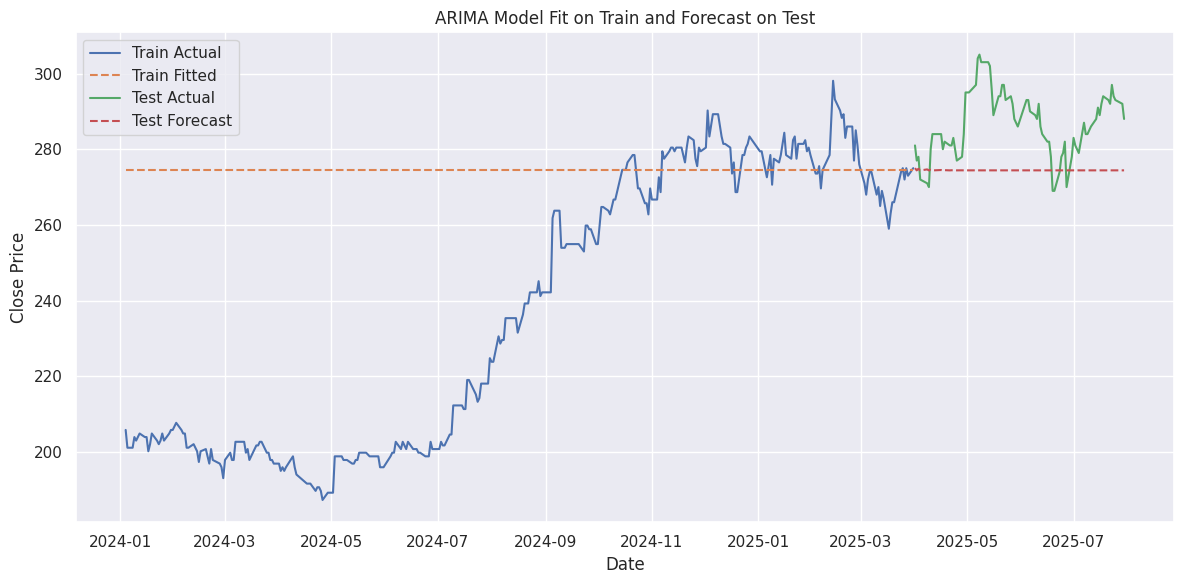

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model on training data
model = ARIMA(train['Close'], order=(3,1,2))
model_fit = # INSERT YOUR CODE HERE

# 1️⃣ In-sample (train) prediction
train_pred = model_fit.predict(start=train.index[0], end=train.index[-1], typ='levels')

# 2️⃣ Out-of-sample forecast on test data
forecast = model_fit.forecast(steps=len(test))

# Plot both train fit and test forecast with actuals
plt.figure(figsize=(12,6))

# Plot actual training data
plt.plot(train['Date'], train['Close'], label='Train Actual')

# Plot model's fitted values on train
plt.plot(train['Date'], train_pred, label='Train Fitted', linestyle='--')

# Plot actual test data
plt.plot(test['Date'], test['Close'], label='Test Actual')

# Plot forecast on test data
plt.plot(test['Date'], forecast, label='Test Forecast', linestyle='--')

plt.title("ARIMA Model Fit on Train and Forecast on Test")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [124]:
def evaluate(y_true, y_pred, name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name}: RMSE={rmse:.4f}, MAE={mae:.4f}")
    return rmse, mae

arima_rmse, arima_mae = evaluate(test['Close'], forecast, name="ARIMA")

ARIMA: RMSE=14.7709, MAE=12.6921


## ✅ Option 1: Linear Extrapolation (Basic Trend Extension)


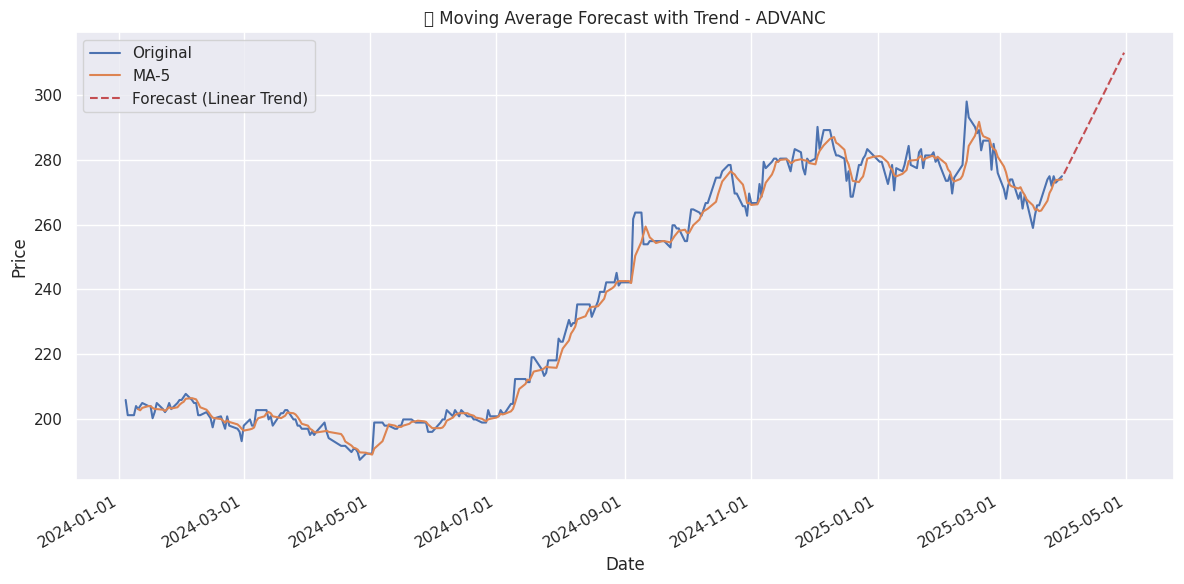

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Use last N MA points to fit a linear model
N = # INSERT YOUR CODE HERE
ma_series = train['MA'].dropna()[-N:]
x = np.arange(N).reshape(-1, 1)
y = ma_series.values

model = LinearRegression().fit(x, y)

# Forecast future values
future_x = np.arange(N, N + 30).reshape(-1, 1)
forecast_values = model.predict(future_x)
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train['Date'], train['Close'], label='Original')
plt.plot(train['Date'], train['MA'], label=f'MA-{ma_window}')
plt.plot(forecast_dates, forecast_values, 'r--', label='Forecast (Linear Trend)')
plt.legend()
plt.title(f"📈 Moving Average Forecast with Trend - {stocks[0]}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

In [126]:
model = LinearRegression().fit(x, y)

# Forecast future MA values
future_x = np.arange(N, N + 30).reshape(-1, 1)
forecast_values = model.predict(future_x)
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Compare with test set
y_true = test['Close'].values[:30]
y_pred = forecast_values[:len(y_true)]

# Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print(f"Linear MA Forecast: RMSE={rmse:.4f}, MAE={mae:.4f}")

Linear MA Forecast: RMSE=10.3701, MAE=8.2888


## ✅ Option 2: Exponential Smoothing Forecast

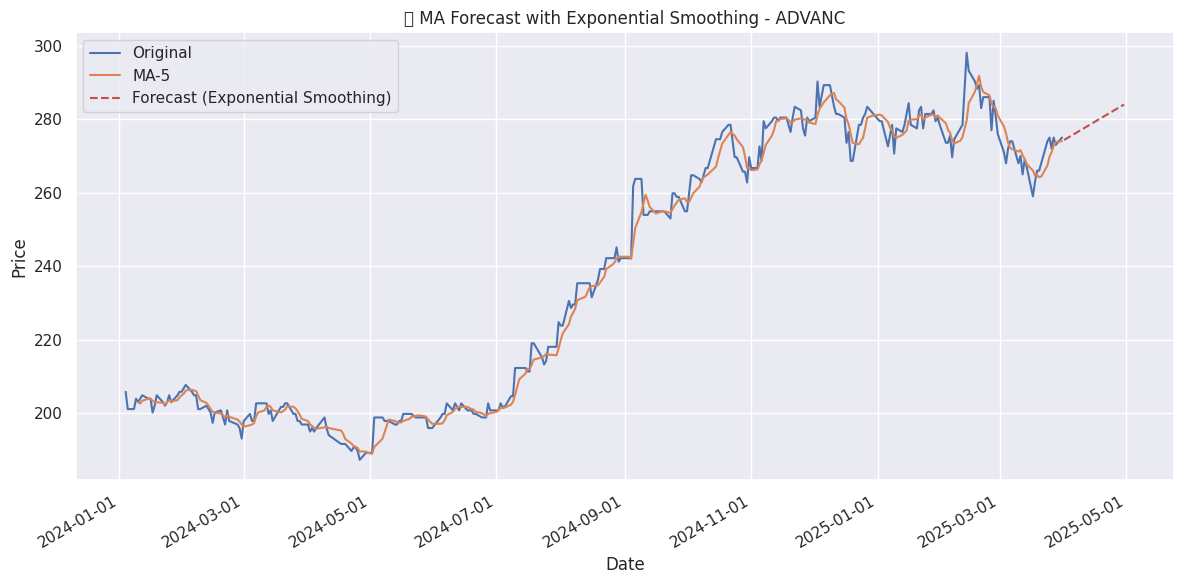

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Drop NaNs and fit model
ma_series = # INSERT YOUR CODE HERE
model = ExponentialSmoothing(ma_series, trend='add', seasonal=None).fit()

# Forecast
forecast_values = model.forecast(30)
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train['Date'], train['Close'], label='Original')
plt.plot(train['Date'], train['MA'], label=f'MA-{ma_window}')
plt.plot(forecast_dates, forecast_values, 'r--', label='Forecast (Exponential Smoothing)')
plt.legend()
plt.title(f"📈 MA Forecast with Exponential Smoothing - {stocks[0]}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


In [128]:
# Fit model on MA values
ma_series = train['MA'].dropna()
model = ExponentialSmoothing(ma_series, trend='add', seasonal=None).fit()

# Forecast
forecast_values = model.forecast(30)
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Metrics
y_true = test['Close'].values[:30]
y_pred = forecast_values[:len(y_true)]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print(f"Exponential Smoothing: RMSE={rmse:.4f}, MAE={mae:.4f}")

Exponential Smoothing: RMSE=11.1255, MAE=8.6985


## ✅ Option 3: Naive MA Extension with Added Noise


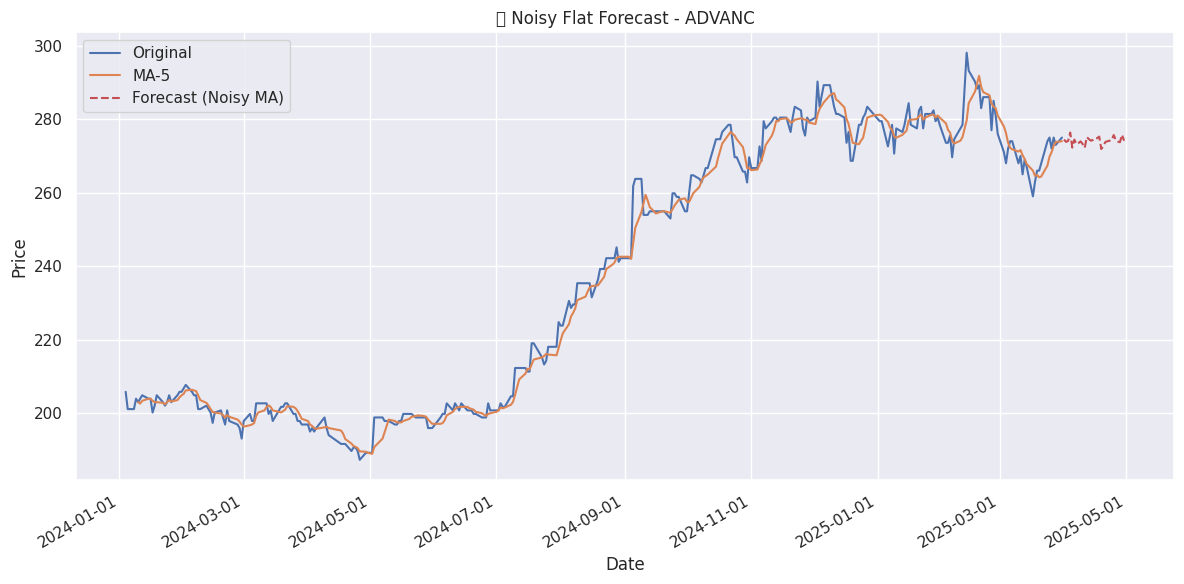

In [ ]:
import numpy as np

last_ma = # INSERT YOUR CODE HERE
forecast_values = last_ma + np.random.normal(scale=1, size=30)  # tweak scale
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train['Date'], train['Close'], label='Original')
plt.plot(train['Date'], train['MA'], label=f'MA-{ma_window}')
plt.plot(forecast_dates, forecast_values, 'r--', label='Forecast (Noisy MA)')
plt.legend()
plt.title(f"📈 Noisy Flat Forecast - {stocks[0]}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


In [130]:
last_ma = train['MA'].iloc[-1]
forecast_values = last_ma + np.random.normal(scale=1, size=30)
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Metrics
y_true = test['Close'].values[:30]
y_pred = forecast_values[:len(y_true)]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print(f"Noisy Flat Forecast: RMSE={rmse:.4f}, MAE={mae:.4f}")

Noisy Flat Forecast: RMSE=16.5957, MAE=13.4105


# 🔮 Step 7: Facebook Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi_hwa6mm/p7tf3yk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi_hwa6mm/7jo0ehwi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76833', 'data', 'file=/tmp/tmpi_hwa6mm/p7tf3yk4.json', 'init=/tmp/tmpi_hwa6mm/7jo0ehwi.json', 'output', 'file=/tmp/tmpi_hwa6mm/prophet_model8stffsg3/prophet_model-20250801101616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:16:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:16:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


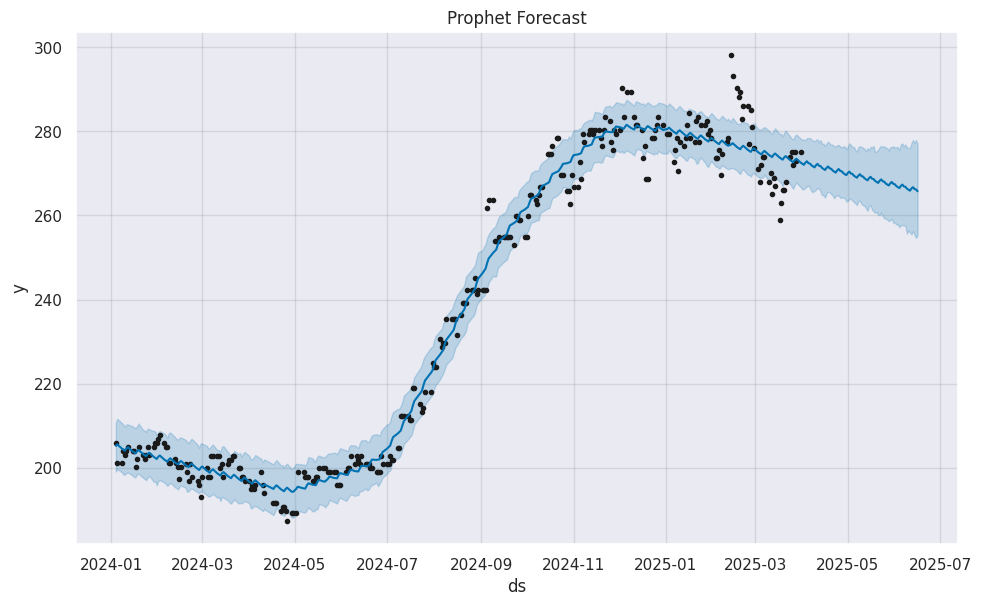

Prophet: RMSE=19.4091, MAE=17.3046


In [ ]:
from prophet import Prophet

prophet_df = sample[['Date', 'Close']].rename(columns={"Date": "ds", "Close": "y"})
prophet_train = prophet_df.iloc[:split_idx]
prophet_test = prophet_df.iloc[split_idx:]

model_prophet = # INSERT YOUR CODE HERE
model_prophet.fit(prophet_train)

future = model_prophet.make_future_dataframe(periods=len(prophet_test), freq='D')
forecast_prophet = model_prophet.predict(future)

# Plot Forecast
model_prophet.plot(forecast_prophet);
plt.title("Prophet Forecast")
plt.show()

# Align with test set
prophet_forecast = forecast_prophet.iloc[-len(prophet_test):]['yhat'].values
prophet_rmse, prophet_mae = evaluate(prophet_test['y'], prophet_forecast, name="Prophet")

# 📅 Step 8: Forecast Until 30 August 2025 with Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi_hwa6mm/z2oimg_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi_hwa6mm/3pawhw8a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40669', 'data', 'file=/tmp/tmpi_hwa6mm/z2oimg_x.json', 'init=/tmp/tmpi_hwa6mm/3pawhw8a.json', 'output', 'file=/tmp/tmpi_hwa6mm/prophet_model4ijjjpwr/prophet_model-20250801101616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:16:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:16:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


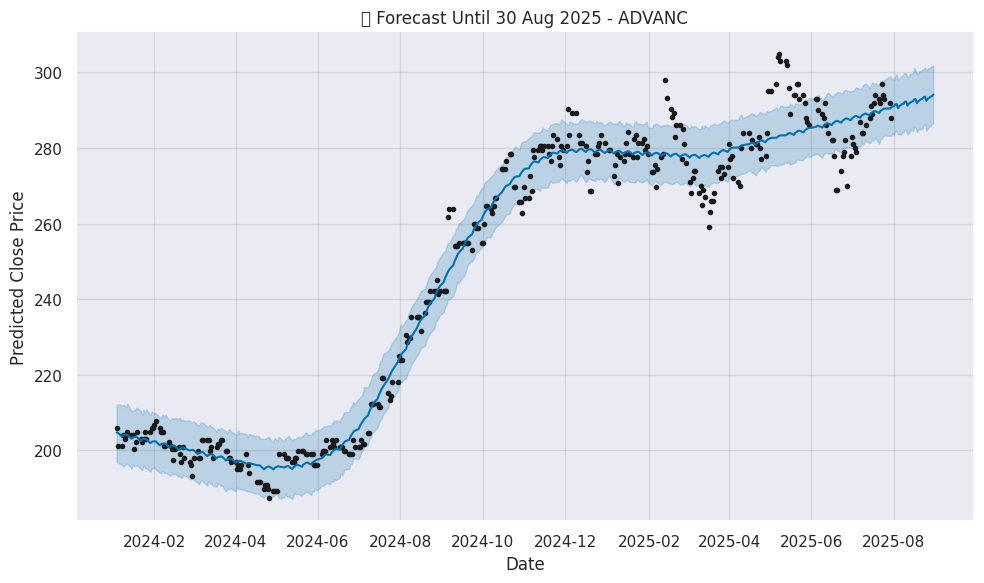

📈 Predicted Prices for August 2025:
            ds        yhat  yhat_lower  yhat_upper
381 2025-07-31  290.976890  284.069963  298.491884
382 2025-08-01  291.076643  283.266144  298.034635
383 2025-08-02  291.565720  284.580277  299.157570
384 2025-08-03  291.657951  284.407413  299.533739
385 2025-08-04  290.579077  283.550481  297.912263
386 2025-08-05  291.106665  283.713504  298.581467
387 2025-08-06  291.377130  283.374550  298.761770
388 2025-08-07  291.622506  284.063301  299.111113
389 2025-08-08  291.722259  284.205169  299.614456
390 2025-08-09  292.211336  284.924045  299.889641


In [ ]:
from datetime import timedelta

latest_date = prophet_df['ds'].max()
target_end_date = pd.to_datetime("2025-08-30")
days_to_forecast = (target_end_date - latest_date).days

model_full = # INSERT YOUR CODE HERE
model_full.fit(prophet_df)

future_aug = model_full.make_future_dataframe(periods=days_to_forecast, freq='D')
forecast_aug = model_full.predict(future_aug)

# Plot full forecast
model_full.plot(forecast_aug)
plt.title(f"📅 Forecast Until 30 Aug 2025 - {stocks[0]}")
plt.xlabel("Date")
plt.ylabel("Predicted Close Price")
plt.tight_layout()
plt.show()

# Show forecasted August 2025 only
forecast_august = forecast_aug[(forecast_aug['ds'] > latest_date) & (forecast_aug['ds'] <= target_end_date)]
print("📈 Predicted Prices for August 2025:")
print(forecast_august[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))

# 📈 **LSTM Forecast for ADVANC Stock**  

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn

## Step 1: Clean and filter your data

In [134]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[pd.notna(df['Date'])]  # Drop rows with invalid dates
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df = df.dropna(subset=['Close'])

# Filter to stock ADVANC only
df_advanc = df[df['Stock'] == 'ADVANC'].sort_values('Date').reset_index(drop=True)

## Step 2: Split train/test

In [135]:
train_size = int(len(df_advanc) * 0.8)
train = df_advanc.iloc[:train_size]
test = df_advanc.iloc[train_size:]

## Step 3: Scale data

In [136]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_advanc[['Close']])

## Step 4: Create sequences

In [ ]:
def create_sequences(data, lookback=10):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = # INSERT YOUR CODE HERE
X_all, y_all = create_sequences(scaled, lookback)

print("X_all shape:", X_all.shape)  # debug check
print("y_all shape:", y_all.shape)

X_all shape: (372, 10, 1)
y_all shape: (372, 1)


## Step 5: Split sequences into train and test sets

In [138]:
X_train = X_all[:train_size - lookback]
y_train = y_all[:train_size - lookback]
X_test = X_all[train_size - lookback:]
y_test = y_all[train_size - lookback:]

## Step 6: Convert to PyTorch tensors

In [139]:
X_train = torch.tensor(X_train, dtype=torch.float32)
if X_train.dim() == 2:  # if missing feature dim, add it
    X_train = X_train.unsqueeze(-1)

y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
if X_test.dim() == 2:
    X_test = X_test.unsqueeze(-1)

y_test = torch.tensor(y_test, dtype=torch.float32)

print("X_train shape:", X_train.shape)  # Should be (samples, seq_len, 1)
print("y_train shape:", y_train.shape)

X_train shape: torch.Size([295, 10, 1])
y_train shape: torch.Size([295, 1])


## Step 7: Define the LSTM Model

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = # INSERT YOUR CODE HERE
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out.squeeze()

model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Step 8: Train the model

In [ ]:
epochs = # INSERT YOUR CODE HERE
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.6f}")

Epoch 5/30 - Loss: 0.259841
Epoch 10/30 - Loss: 0.211887
Epoch 15/30 - Loss: 0.167196
Epoch 20/30 - Loss: 0.125678
Epoch 25/30 - Loss: 0.096030
Epoch 30/30 - Loss: 0.100354


## Step 9: Evaluate on test set

In [142]:
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test).numpy()

# Inverse scale predictions and actuals
predicted_prices = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

## Step 10: Calculate metrics

In [143]:
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f"LSTM (PyTorch) Test RMSE: {rmse:.4f}, MAE: {mae:.4f}")

LSTM (PyTorch) Test RMSE: 31.1693, MAE: 30.1782


## Step 11: Plot actual vs predicted

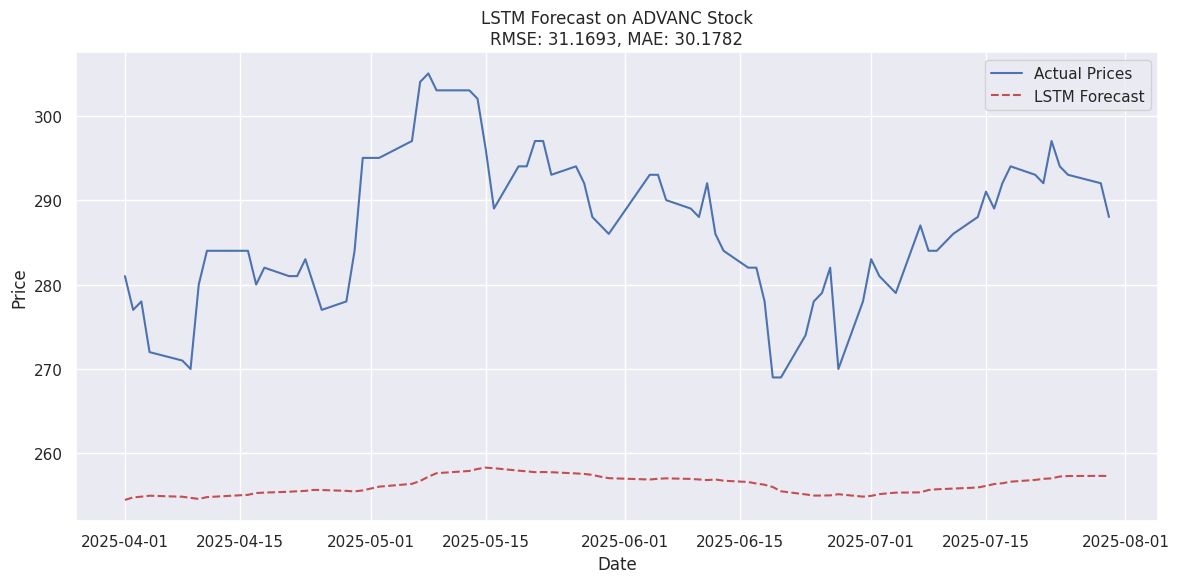

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(df_advanc['Date'].iloc[train_size:], actual_prices, label='Actual Prices')
plt.plot(df_advanc['Date'].iloc[train_size:], predicted_prices, 'r--', label='LSTM Forecast')
plt.title(f"LSTM Forecast on ADVANC Stock\nRMSE: {rmse:.4f}, MAE: {mae:.4f}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧠 Week 6 AI Homework Summary

📌 **Task**: Forecast daily closing prices for 5 Thai stocks using any method (MA, machine learning, deep learning) to achieve the lowest RMSE.

✅ **Steps**:
- Download and clean stock data for:  
  `{'AOT.BK': 'AOT', 'BDMS.BK': 'BDMS', 'BAY.BK': 'BAY', 'ESSO.BK': 'ESSO', 'HMPRO.BK': 'HMPRO'}`
- Explore and preprocess data
- Build forecasting models (e.g., MA, LSTM)
- Evaluate using RMSE and MAE
- Plot actual vs forecasted prices

📄 **Full details**: See `AI-Homework-Assignment-Week-6.pdf`

📅 **Deadline**: To be announced in class
